In [53]:
import numpy as np
import pandas as pd

In [54]:
import tensorflow as tf

BATCH_SIZE = 40
IMG_WIDTH  = 128 
IMG_HEIGHT = 128 
DATASET_DIR = "../input/animals10/raw-img"

In [55]:
animals_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  DATASET_DIR,
  seed = 37,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE, 
  labels = 'inferred'
)

Found 26179 files belonging to 10 classes.


In [56]:
def countTuplesByClass(x,y):
    dataset_unbatched = tuple(x.unbatch())
    labels = []
    for (image,label) in dataset_unbatched:
        labels.append(label.numpy())
    labels = pd.Series(labels)
    counts = labels.value_counts()
    
    for i in range(len(counts)):
        print(y[i] + "\t\t" + str(counts[i]))

In [57]:
animals_names = animals_dataset.class_names
animals_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [58]:
countTuplesByClass(animals_dataset,animals_names)

2022-10-15 10:19:17.608028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
2022-10-15 10:19:17.836369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-10-15 10:19:17.838657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:18.173886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:18.822402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:19.706729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:20.479933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup 

cane		4863
cavallo		2623
elefante		1446
farfalla		2112
gallina		3098
gatto		1668
mucca		1866
pecora		1820
ragno		4821
scoiattolo		1862


In [59]:
animals_dataset.take(1)

<TakeDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

In [60]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
        
    print("locura")
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    print(train_size)
    print(val_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return val_ds, test_ds, train_ds

In [61]:
# len / batch size
26179 / BATCH_SIZE

654.475

In [62]:
len(animals_dataset)

655

In [63]:
validation_set, test_set, training_set = get_dataset_partitions_tf(animals_dataset,654,train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=10000)

locura
392
130


In [64]:
countTuplesByClass(training_set, animals_names)

2022-10-15 10:19:35.722146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
2022-10-15 10:19:35.947931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-10-15 10:19:35.950802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:36.269405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:36.886986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:37.756795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:38.484470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup 

cane		2884
cavallo		1558
elefante		852
farfalla		1280
gallina		1875
gatto		982
mucca		1116
pecora		1133
ragno		2873
scoiattolo		1127


In [65]:
countTuplesByClass(validation_set, animals_names)

2022-10-15 10:19:56.265174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
2022-10-15 10:19:56.491697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-10-15 10:19:56.495453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:56.805701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:57.430501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:58.310053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:19:59.030662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup 

cane		972
cavallo		518
elefante		283
farfalla		447
gallina		603
gatto		334
mucca		366
pecora		350
ragno		938
scoiattolo		389


In [66]:
countTuplesByClass(test_set, animals_names)

2022-10-15 10:20:13.698661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
2022-10-15 10:20:13.928389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-10-15 10:20:13.931710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:20:14.251763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:20:14.858692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:20:15.743488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-15 10:20:16.470223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup 

cane		978
cavallo		530
elefante		281
farfalla		438
gallina		662
gatto		355
mucca		398
pecora		355
ragno		945
scoiattolo		378


## Simple Visualization

In [67]:
animals10_names = animals_dataset.class_names

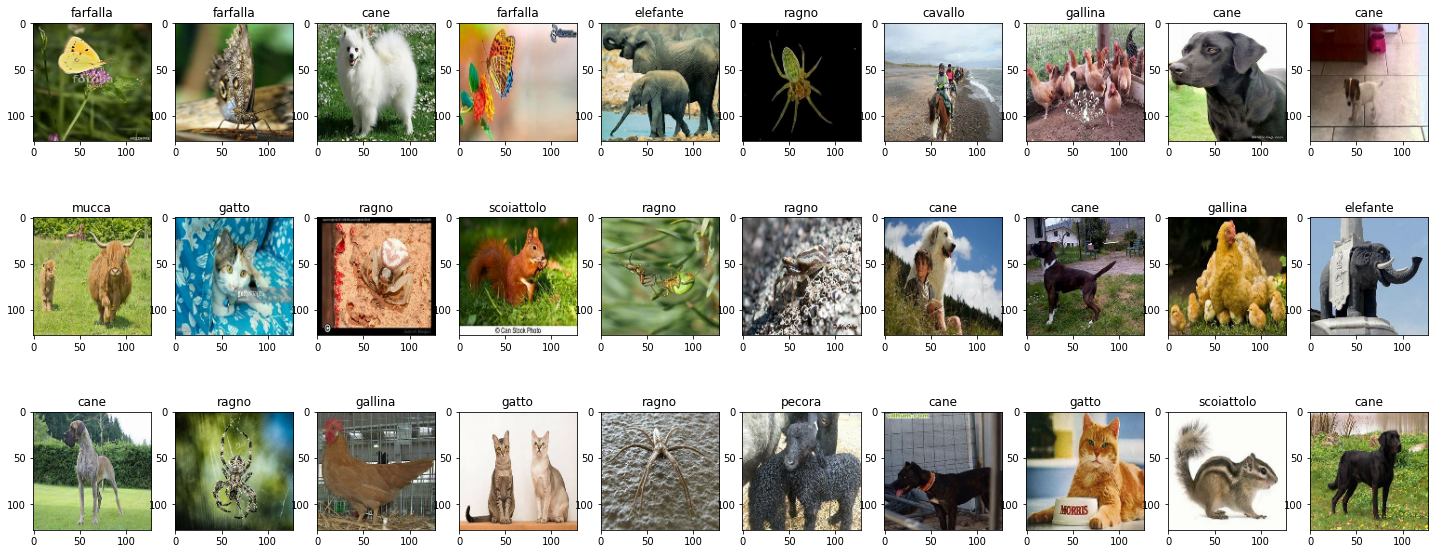

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 28))

for images, labels in animals_dataset.take(1):
    for i in range(30):
        ax = plt.subplot(8, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(animals10_names[labels[i]])

In [69]:
def fixing_images(images):
    return images/255

In [70]:
training_set = training_set.prefetch(128)
validation_set = validation_set.prefetch(128)
test_set = test_set.prefetch(128)

In [71]:
test_set.take(1)

<TakeDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
test_set.

In [17]:
X_train = training_dataset.map(fixing_images)
X_valid = validation_dataset.map(fixing_images)

TypeError: in user code:


    TypeError: tf__fixing_images() takes 1 positional argument but 2 were given


In [ ]:

model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, input_shape = [IMG_WIDTH, IMG_HEIGHT, 3], kernel_size = 3, 
                                padding = 'same', activation = 'relu'),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Conv2D(64, kernel_size = 3,
                                padding = 'same', activation = 'relu'),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Conv2D(128, kernel_size = 3,
                                padding = 'same', activation = 'relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1000)
            tf.keras.layers.Dense(500)
            tf.keras.layers.Dense(len(animals10_names))
            tf.keras.layers.Softmax()
])

model.summary()